In [1]:
import meep as mp
from meep import mpb
import numpy as np
from meep import mpb
from matplotlib import pyplot as plt
from IPython.display import Video
from meep.materials import Si, SiO2

Using MPI version 3.1, 1 processes


## 2D example: slab waveguide

In [2]:
W = 1.0 # Width of waveguide in microns
lambda_0 = 6.67

In [3]:
Si_lambda0 = mp.Medium(epsilon=np.real(Si.epsilon(1/lambda_0)[0,0]))

# Define the computational cell.  We'll make x the propagation direction.
# the other cell sizes should be big enough so that the boundaries are
# far away from the mode field.
sc_y = 2  # supercell width (um)
sc_z = 0  # supercell height (um)
geometry_lattice = mp.Lattice(size=mp.Vector3(0, sc_y, sc_z))

# define the 2d blocks for the strip and substrate
geometry = [mp.Block(size=mp.Vector3(mp.inf, W, mp.inf), material=Si_lambda0)]

resolution = 32  # pixels/um

num_bands = 1

ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    geometry=geometry,
    resolution=resolution,
    num_bands=num_bands,
)

In [4]:
omega = 1 / lambda_0  # frequency corresponding to 1.55um

# Output the x component of the Poynting vector for num_bands bands at omega
k = ms.find_k(mp.NO_PARITY, omega, 1, num_bands, mp.Vector3(1), 1e-3, omega * 3.45,
          omega * 0.1, omega * 4)

Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 64 x 1.
Solving for 1 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 2, 0)
     (0, 0, 1)
Cell volume = 2
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.5, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
1 k-points
  Vector3<0.5172413793103449, 0.0, 0.0>
elapsed time for initialization: 0.009616374969482422
solve_kpoint (0.517241,0,0):
Solving for bands 1 to 1...
Finished solving for bands 1 to 1 after 15 iterations.
freqs:, 1, 0.517241, 0, 0, 0.517241, 0.175927
elapsed time for k point: 0.01573348045349121
total elap

epsilon: 1-11.6934, mean 6.34668, harm. mean 1.88423, 51.5625% > 1, 50% "fill"


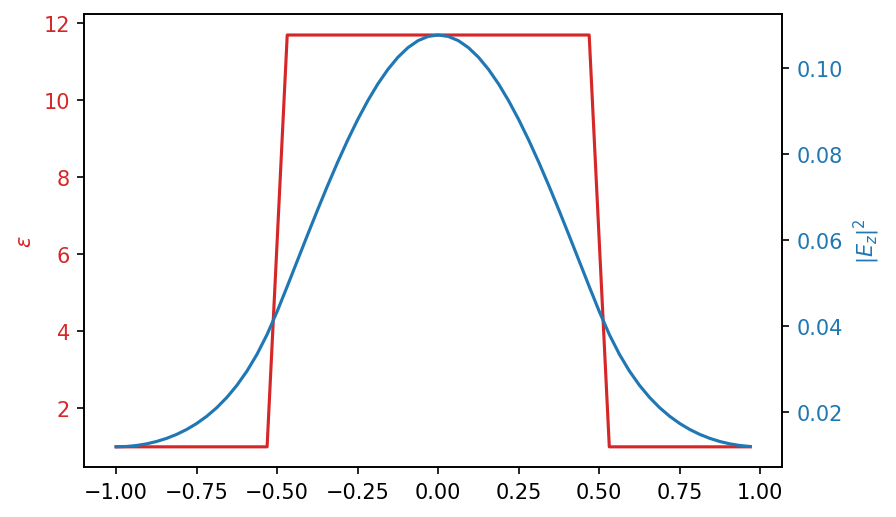

In [5]:
eps = ms.get_epsilon()
E = ms.get_efield(1)
H = ms.get_hfield(1)
fig, ax1 = plt.subplots(dpi=150)
x = np.arange(-sc_y/2,sc_y/2,1.0/resolution)

color = 'tab:red'
ax1.plot(x,eps, color=color)
ax1.set_ylabel('$\epsilon$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax1.twinx() 
ax2.plot(x,np.abs(E[:,0,0,2])**2, color=color)
ax2.set_ylabel('$|E_{z}|^2$', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
plt.show()

In [6]:
# The k (i.e. beta, i.e. propagation constant) points to look at, in
# units of 2*pi/um.  We'll look at num_k points from k_min to k_max.
num_k = 9
k_min = 0.1
k_max = 3.0
k_points = mp.interpolate(num_k, [mp.Vector3(k_min), mp.Vector3(k_max)])

num_bands = 3

ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    geometry=geometry,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands,
)

ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list
te_vgrp = ms.compute_group_velocities()

ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
tm_vgrp = ms.compute_group_velocities()

Initializing eigensolver data
Computing 3 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 64 x 1.
Solving for 3 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 2, 0)
     (0, 0, 1)
Cell volume = 2
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.5, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: te.
Initializing fields to random numbers...
11 k-points
  Vector3<0.1, 0.0, 0.0>
  Vector3<0.39, 0.0, 0.0>
  Vector3<0.6799999999999999, 0.0, 0.0>
  Vector3<0.9699999999999999, 0.0, 0.0>
  Vector3<1.26, 0.0, 0.0>
  Vector3<1.55, 0.0, 0.0>
  Vector3<1.8399999999999999, 0.0, 0.0>
  Vector3<2.13, 0.0, 0.0>
  Vector3<2.42, 0.0, 0.0>
  Vector3<2.71, 0.0, 0.0>
  Ve

Single mode TE wavelength range: 2.542 microns - 7.083 microns.


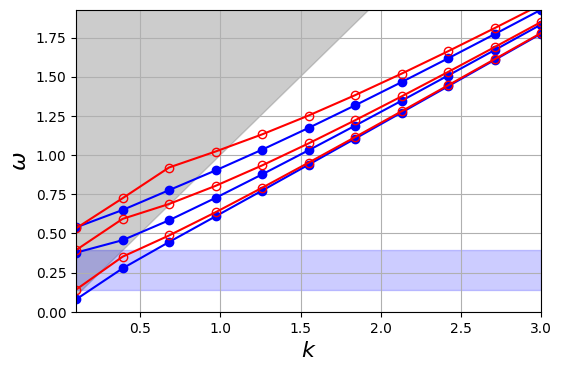

In [7]:
fig, ax = plt.subplots(dpi=100)

x = [ix.x for ix in k_points]
# Plot bands

ax.plot(x,tm_freqs*sc_y, 'o-',color='blue',label='TM')
ax.plot(x,te_freqs*sc_y, 'o-',color='red',label='TE',fillstyle='none')

# Plot light line
max_y = np.max((tm_freqs*sc_y).flatten())
ax.fill_between(x,x,[max_y]*len(x),alpha=0.4,color='gray')

# Plot single mode cutoff regime
cutoff_mode = te_freqs[0,0]*sc_y
single_mode = te_freqs[0,1]*sc_y
print('Single mode TE wavelength range: {:1.3f} microns - {:1.3f} microns.'.format(1/single_mode,1/cutoff_mode))

ax.fill_between(x,cutoff_mode,[single_mode]*len(x),alpha=0.2,color='blue')

plt.ylim(0,max_y)
plt.xlim(np.min(x),np.max(x))
ax.set_ylabel('$\omega$', size=16)
ax.set_xlabel('$k$', size=16)
ax.grid(True)

plt.show()

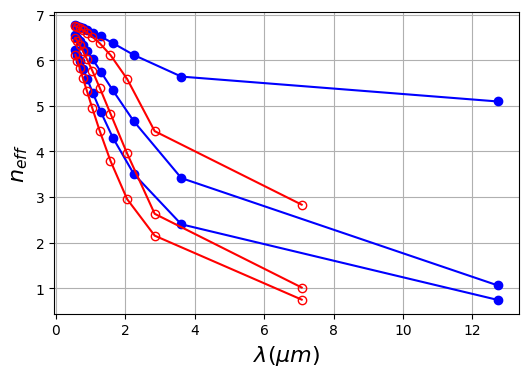

In [22]:
fig, ax = plt.subplots(dpi=100)

neff_TE = np.squeeze(np.array([x]).T / te_freqs*sc_y)
neff_TM = np.squeeze(np.array([x]).T / tm_freqs*sc_y)

# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298

ax.plot(1/(tm_freqs[:,0]*sc_y),neff_TM,'o-',color='blue',label='TM')
ax.plot(1/(te_freqs[:,0]*sc_y),neff_TE,'o-',color='red',label='TE',fillstyle='none')

#ax.legend()

ax.set_ylabel('$n_{eff}$', size=16)
ax.set_xlabel('$\lambda (\mu m)$', size=16)
ax.grid(True)

plt.show()

[Vector3<0.28860333785879905, -3.418203310712544e-06, 0.0>, Vector3<0.27799420108911366, 1.4802646596733502e-05, 0.0>, Vector3<0.2627667121704331, -2.7710936819445743e-05, 0.0>]


ValueError: setting an array element with a sequence.

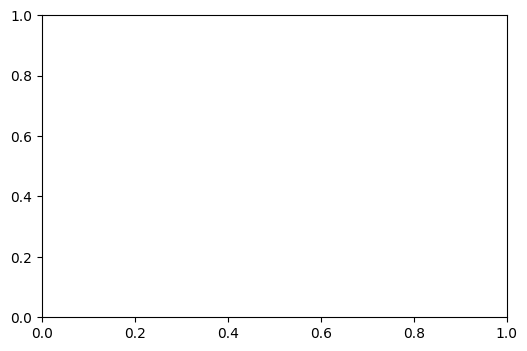

In [17]:
fig, ax = plt.subplots(dpi=100)

print(te_vgrp)

# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298

ax.plot(1/(tm_freqs[:,0]*sc_y),1/np.array(te_vgrp),'o-',color='blue',label='TM')
ax.plot(1/(te_freqs[:,0]*sc_y),1/np.array(tm_vgrp),'o-',color='red',label='TE',fillstyle='none')

ax.legend()

ax.set_ylabel('$n_{grp}$', size=16)
ax.set_xlabel('$\lambda (\mu m)$', size=16)
ax.grid(True)

plt.show()